In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pickle

In [145]:
import os
reference_table = pd.read_csv("./cbsa-state-mapping.csv", sep=";")
reference_table['CBSA Code'] = reference_table['CBSA Code'].astype(int) / 10
reference_table['CBSA Code'] = ('C' + reference_table['CBSA Code'].astype(int).astype(str))
reference_table['area_fips'] = reference_table['CBSA Code']
reference_table = reference_table[['area_fips', 'State Name']].drop_duplicates()
for file in os.listdir("./msa_files"):
    df = pd.read_csv("./msa_files/" + file)
    merged = pd.merge(df, reference_table, how='left', on="area_fips")
    merged.to_csv("./msa_files/WITH_STATE_" + file)
    

In [95]:
# REDO msa edition
treated_msas = ['C4194', 'C4266', 'C4162', 'C4174', 'C1450', 'C3070', 'C2642', 'C1698', 'C1658', 'C1146', 'C3830', 'C2706', 'C1206', 'C4790', 'C1446', 'C4594']

outcomes_to_test = ['lq_annual_avg_estabs', 'lq_annual_avg_emplvl',
       'lq_avg_annual_pay', 'annual_avg_estabs', 'annual_avg_emplvl', 'avg_annual_pay']

industries_to_test = ['51', '511', '512', '515', '516', '517', '518', '519']


for industry in industries_to_test:
    dfs = []
    print(industry)
    for year in range(1990, 2019):
        df = pd.read_csv('./original_data/' + str(year) + '.annual.singlefile.csv')
        df = df[['area_fips', 'industry_code', 'lq_annual_avg_estabs', 'lq_annual_avg_emplvl',
           'lq_avg_annual_pay', 'annual_avg_estabs', 'annual_avg_emplvl', 'annual_avg_pay']]
        df = df[df['area_fips'].astype(str).str.contains(pat="([C][0-9][0-9][0-9][0-9])", regex=True, na=False)]
        df = df[df['industry_code'].astype(str).str.contains(pat="^" + industry + "$", regex=True, na=False)]
        df['year'] = year
        dfs.append(df)
    master_df = pd.concat(dfs, axis=0)

    # now, need to groupby the year+area_fips and sort by year
    group = master_df.sort_values(['year'],ascending=True).groupby(['area_fips', 'year'])
    master_df = group.agg({'lq_annual_avg_estabs':sum, 'lq_annual_avg_emplvl':sum, 'lq_avg_annual_pay':sum,
                           'annual_avg_estabs':sum, 'annual_avg_emplvl':sum, 'avg_annual_pay':sum}).reset_index()
    master_df.to_csv("panel_" + industry + "_msa.csv")

51


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler,

511


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler,

512


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler,

515


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler,

516


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler,

517


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler,

518


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler,

519


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler,

In [97]:
# REDO county edition
treated_msas = ['C4194', 'C4266', 'C4162', 'C4174', 'C1450', 'C3070', 'C2642', 'C1698', 'C1658', 'C1146', 'C3830', 'C2706', 'C1206', 'C4790', 'C1446', 'C4594']

outcomes_to_test = ['lq_annual_avg_estabs', 'lq_annual_avg_emplvl',
       'lq_avg_annual_pay', 'annual_avg_estabs', 'annual_avg_emplvl', 'avg_annual_pay']

industries_to_test = ['51', '511', '512', '515', '516', '517', '518', '519']


for industry in industries_to_test:
    dfs = []
    print(industry)
    for year in range(1990, 2019):
        df = pd.read_csv('./original_data/' + str(year) + '.annual.singlefile.csv')
        df = df[['area_fips', 'industry_code', 'lq_annual_avg_estabs', 'lq_annual_avg_emplvl',
           'lq_avg_annual_pay', 'annual_avg_estabs', 'annual_avg_emplvl', 'avg_annual_pay', 'own_code']]
        df = df[(df['area_fips'].astype(str).str.isdigit()) & (df['own_code'] == 5)]
        df = df[df['industry_code'].astype(str).str.contains(pat="^" + industry + "$", regex=True, na=False)]
        df.drop(['industry_code', 'own_code'], axis=1, inplace=True)
        df['year'] = year
        dfs.append(df)
    master_df = pd.concat(dfs, axis=0)

    # now, need to groupby the year+area_fips and sort by year
    group = master_df.sort_values(['year'],ascending=True).groupby(['area_fips', 'year'])
    master_df = group.agg({'lq_annual_avg_estabs':sum, 'lq_annual_avg_emplvl':sum, 'lq_avg_annual_pay':sum,
                           'annual_avg_estabs':sum, 'annual_avg_emplvl':sum, 'avg_annual_pay':sum}).reset_index()
    master_df.to_csv("panel_" + industry + "_county.csv")

51


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


511


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,15,23) have mixed types. Specify 

512


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,15,23) have mixed types. Specify 

515


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,15,23) have mixed types. Specify 

516


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,15,23) have mixed types. Specify 

517


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,15,23) have mixed types. Specify 

518


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,15,23) have mixed types. Specify 

519


/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,15,23) have mixed types. Specify 

## raw files to smaller files with relevant areas and measurements

In [134]:
cols_to_keep = ['area_fips', 'industry_code', 'year', 'disclosure_code', 'lq_disclosure_code', 'lq_annual_avg_estabs', 'lq_annual_avg_emplvl',
       'lq_avg_annual_pay', 'annual_avg_estabs', 'annual_avg_emplvl', 'avg_annual_pay']
for i in range(1990, 2019):
    csv_name = './original_data/' + str(i) + ".annual.singlefile.csv"
    df = pd.read_csv(csv_name)
    df_subset = df[cols_to_keep]
    df_subset_counties_only = df_subset[df['area_fips'].astype(str).str.isdigit()]
    df_subset_counties_only.to_csv('./stripped_down_data/' + str(i) + ".counties_only_no_oty.csv")
    

/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,7,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## computing fips-to-nearest-node measurements

In [55]:
!pip install haversine

You should consider upgrading via the 'pip install --upgrade pip' command.


In [108]:
msas_latlon_df = pd.read_csv("./R_Files/TEST_CENTROIDS.csv")

In [109]:
from operator import itemgetter
from haversine import haversine_vector

nsfnet_node_locations = [("Seattle", (47.606209, -122.332069)), ("Palo Alto", (37.441883, -122.143021)), 
                         ("San Diego", (32.715736, -117.161087)), ("Salt Lake City", (40.760780, -111.891045)),
                        ("Boulder", (40.014984, -105.270546)), ("Lincoln", (40.806862, -96.681679)), 
                         ("Argonne", (41.7092, -87.9820)), ("Houston", (29.749907, -95.358421)), 
                         ("Ann Arbor", (42.279594, -83.732124)), ("Pittsburgh", (40.440624, -79.995888)), 
                         ("Urbana-Champaign", (40.1164, -88.2434)), ("Atlanta", (33.753746, -84.386330)), 
                         ("Ithaca", (42.443962, -76.501884)), ("Cambridge", (42.373611, -71.110558)),
                         ("Princeton", (40.3487, -74.6591)), ("College Park", (38.9897, -76.9378))]

msas_coord_tuples = list(zip(msas_latlon_df['lat'], msas_latlon_df['lon']))
for city, coordinates in nsfnet_node_locations:
    msas_latlon_df[city] = list(zip(haversine_vector(msas_coord_tuples, [coordinates]*938), [city]*938))

msas_latlon_df['combined'] = msas_latlon_df[['Seattle', 'Palo Alto', 'San Diego', 'Salt Lake City',
       'Boulder', 'Lincoln', 'Argonne', 'Houston', 'Ann Arbor', 'Pittsburgh',
       'Urbana-Champaign', 'Atlanta', 'Ithaca', 'Cambridge', 'Princeton',
       'College Park']].values.tolist()

msas_latlon_df['nearest'] = msas_latlon_df['combined'].apply(lambda x: min(x, key=itemgetter(0)))

msas_latlon_df[['nearest_dist', 'nearest_location']] = pd.DataFrame(msas_latlon_df['nearest'].tolist(), index=msas_latlon_df.index)
msas_latlon_df = msas_latlon_df[['msa_code', 'lat', 'lon', 'nearest_dist', 'nearest_location']]



In [110]:
msas_latlon_df['msa_code'] = ('C' + msas_latlon_df['msa_code'].astype(int).astype(str))

In [112]:
msas_latlon_df.to_csv("msas_latlon_closest_node.csv")

In [58]:
#record nsfnet node lat lons and load county centroid latlons
nsfnet_node_locations = [("Seattle", (47.606209, -122.332069)), ("Palo Alto", (37.441883, -122.143021)), 
                         ("San Diego", (32.715736, -117.161087)), ("Salt Lake City", (40.760780, -111.891045)),
                        ("Boulder", (40.014984, -105.270546)), ("Lincoln", (40.806862, -96.681679)), 
                         ("Argonne", (41.7092, -87.9820)), ("Houston", (29.749907, -95.358421)), 
                         ("Ann Arbor", (42.279594, -83.732124)), ("Pittsburgh", (40.440624, -79.995888)), 
                         ("Urbana-Champaign", (40.1164, -88.2434)), ("Atlanta", (33.753746, -84.386330)), 
                         ("Ithaca", (42.443962, -76.501884)), ("Cambridge", (42.373611, -71.110558)),
                         ("Princeton", (40.3487, -74.6591)), ("College Park", (38.9897, -76.9378))]
fips_latlon_df = pd.read_csv("./R_Files/county_latlongs.csv")

In [217]:
msas_latlon_df = pd.read_csv("msas_latlon_closest_node.csv")

msas_latlon_df = msas_latlon_df[['msa_code', 'nearest_dist', 'nearest_location']]
msas_latlon_df.rename(columns={'msa_code':'area_fips'}, inplace=True)
msas_latlon_df.set_index('area_fips', inplace=True)

for ind in ['51', '511', '512', '515', '516', '517', '518']:
    df = pd.read_csv("./msa_files/panel_"+ ind + "_msa.csv")
    df.reset_index(inplace=True)
    df.set_index('area_fips',inplace=True)
    df = df.join(msas_latlon_df, on='area_fips')
    df.to_csv("./msa_files/panel_" + ind + "_msa_WITH_NEAREST.csv")

In [60]:
from haversine import haversine_vector, Unit

In [61]:
len(fips_latlon_df)

3075

In [62]:
fips_coord_tuples = list(zip(fips_latlon_df['lat'], fips_latlon_df['lon']))

In [70]:
# calculate distance away from nsfnet nodes
for city, coordinates in nsfnet_node_locations:
    fips_latlon_df[city] = list(zip(haversine_vector(fips_coord_tuples, [coordinates]*3075), [city]*3075))

In [73]:
fips_latlon_df.columns

Index(['idx', 'fips', 'county', 'state', 'lon', 'lat', 'rMapState',
       'rMapCounty', 'Seattle', 'Palo Alto', 'San Diego', 'Salt Lake City',
       'Boulder', 'Lincoln', 'Argonne', 'Houston', 'Ann Arbor', 'Pittsburgh',
       'Urbana-Champaign', 'Atlanta', 'Ithaca', 'Cambridge', 'Princeton',
       'College Park'],
      dtype='object')

In [74]:
fips_latlon_df['combined'] = fips_latlon_df[['Seattle', 'Palo Alto', 'San Diego', 'Salt Lake City',
       'Boulder', 'Lincoln', 'Argonne', 'Houston', 'Ann Arbor', 'Pittsburgh',
       'Urbana-Champaign', 'Atlanta', 'Ithaca', 'Cambridge', 'Princeton',
       'College Park']].values.tolist()

In [78]:
from operator import itemgetter

fips_latlon_df['nearest'] = fips_latlon_df['combined'].apply(lambda x: min(x, key=itemgetter(0)))

In [81]:
fips_latlon_df[['nearest_dist', 'nearest_location']] = pd.DataFrame(fips_latlon_df['nearest'].tolist(), index=fips_latlon_df.index)

In [83]:
fips_latlon_df.columns

Index(['idx', 'fips', 'county', 'state', 'lon', 'lat', 'rMapState',
       'rMapCounty', 'Seattle', 'Palo Alto', 'San Diego', 'Salt Lake City',
       'Boulder', 'Lincoln', 'Argonne', 'Houston', 'Ann Arbor', 'Pittsburgh',
       'Urbana-Champaign', 'Atlanta', 'Ithaca', 'Cambridge', 'Princeton',
       'College Park', 'combined', 'nearest', 'nearest_dist',
       'nearest_location'],
      dtype='object')

In [84]:
fips_latlon_df = fips_latlon_df[['fips', 'county', 'state', 'lon', 'lat', 'rMapState',
       'rMapCounty', 'nearest_dist',
       'nearest_location']]

In [86]:
fips_latlon_df.to_csv("fips_latlon_closest_node.csv")

## Now, we have the counties and their distance from the closest node... now what?

For SEPARATE YEARS,
Need to correlate distance-from-node with some measurement like LQ for a specific industry.
Will need to experiment with throwing away measurements that are greater than some number 

For the year: 

for each entry, look up the corresponding closest distance from the existing flips_latlon_closest_node table. record the distance in the file itself (if the fips code exists); record the metric of interest.

At the end, should have a fips - industry code - distance - central node - measures of interest

should be able to segment by central node -> pick out only a few relevant industry codes -> obtain the distance+measure of interest list -> calculate things like R^2


so the original idea of LQ correlating with distance didn't work. This is probably because (especially in 2018) it doesn't matter much (though I'd expect spillover effects at least..........)
perhaps it mattered more starting out?

In [ ]:
df1 = 

/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [146]:
master_corr_dict = {}
for i in range(1990, 2019):
    df = pd.read_csv(str(i) + ".counties_only.csv")
    fips_to_node_dict = dict(zip(fips_latlon_df['fips'], fips_latlon_df['nearest_location']))
    fips_to_distance_dict = dict(zip(fips_latlon_df['fips'], fips_latlon_df['nearest_dist']))
    df['closest_distance'] = df['area_fips'].map(fips_to_distance_dict)
    df['closest_node'] = df['area_fips'].map(fips_to_node_dict)
    corr_dict = {}
    for city in ['Seattle', 'Palo Alto', 'San Diego', 'Salt Lake City',
           'Boulder', 'Lincoln', 'Argonne', 'Houston', 'Ann Arbor', 'Pittsburgh',
           'Urbana-Champaign', 'Atlanta', 'Ithaca', 'Cambridge', 'Princeton', 'College Park']:

        subset_to_analyze = df[(df['closest_node'] == city) & (df['closest_distance'] < 250)]
        
        for j in range(1, 10):
            industries_in_subset = subset_to_analyze[(subset_to_analyze['industry_code'].astype(str).str.startswith("51" + str(j))) ]
            corr_dict[(city, j)] = industries_in_subset['closest_distance'].corr(industries_in_subset['lq_annual_avg_emplvl'])
    
    master_corr_dict[i] = corr_dict

pickle.dump(master_corr_dict, open( "mastercorrdict.p", "wb"))
    

/Users/gaoag/.virtualenvs/machinelearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
master_corr_dict

{1990: {('Seattle', 1): -0.0027133354869899183,
  ('Seattle', 2): -0.24461285486942536,
  ('Seattle', 3): nan,
  ('Seattle', 4): nan,
  ('Seattle', 5): 0.19724543999676292,
  ('Seattle', 6): nan,
  ('Seattle', 7): -0.21939363352230334,
  ('Seattle', 8): 0.041620683977940574,
  ('Seattle', 9): 0.35964702106269936,
  ('Palo Alto', 1): -0.22237551364956576,
  ('Palo Alto', 2): -0.46378029743183724,
  ('Palo Alto', 3): nan,
  ('Palo Alto', 4): nan,
  ('Palo Alto', 5): 0.13401627964387727,
  ('Palo Alto', 6): nan,
  ('Palo Alto', 7): -0.186983985779375,
  ('Palo Alto', 8): -0.18235669777007543,
  ('Palo Alto', 9): -0.3175259432345069,
  ('San Diego', 1): -0.24638848016906834,
  ('San Diego', 2): 0.5459424044204686,
  ('San Diego', 3): nan,
  ('San Diego', 4): nan,
  ('San Diego', 5): 0.54094517022635,
  ('San Diego', 6): nan,
  ('San Diego', 7): -0.027103476562272844,
  ('San Diego', 8): 0.27222454793134193,
  ('San Diego', 9): 0.5453967291430556,
  ('Salt Lake City', 1): 0.4037092486148718

In [ ]:
pickle.load( open( "save.p", "rb" ) )

In [141]:
corr_dict

{'Seattle': 0.03849784840264601,
 'Palo Alto': -0.11419897073613322,
 'San Diego': 0.2042064017456105,
 'Salt Lake City': 0.20172244417078267,
 'Boulder': -0.09415507908191317,
 'Lincoln': 0.06101398217102334,
 'Argonne': 0.13944532648631872,
 'Houston': 0.24572160773901022,
 'Ann Arbor': -0.09140602605294319,
 'Pittsburgh': -0.008165613757453637,
 'Urbana-Champaign': -0.017230126046660545,
 'Atlanta': -0.14496870261605457,
 'Ithaca': -0.10426579786720484,
 'Cambridge': 0.012123363453802707,
 'Princeton': -0.03197455540405069,
 'College Park': -0.12247291695721535}

In [126]:
corr_dict

{'Seattle': 0.04090961400405816,
 'Palo Alto': 0.08001163817882827,
 'San Diego': -0.01569358144615146,
 'Salt Lake City': 0.15762255220051413,
 'Boulder': 0.047363084472773764,
 'Lincoln': 0.06429058989888625,
 'Argonne': 0.07910771828448739,
 'Houston': -0.04534196890182699,
 'Ann Arbor': 0.009085901414515984,
 'Pittsburgh': 0.07664706043825774,
 'Urbana-Champaign': -0.03417564102459218,
 'Atlanta': 0.01032303702324806,
 'Ithaca': -0.003744151835614069,
 'Cambridge': -0.01059559033456238,
 'Princeton': 0.05765424271795049,
 'College Park': 0.11220931422507241}

In [119]:
industries_in_subset['closest_distance'].corr(industries_in_subset['lq_annual_avg_estabs'])

0.02824814391412012

In [ ]:
### lets say centralization right now doesn't correlate too much with distance. 
### What abt wages/num of establishments? Need to get the OTy 

In [120]:
"""

"42343")) |
    (subset_to_analyze['industry_code'].astype(str).str.startswith("5415")) |
    (subset_to_analyze['industry_code'].astype(str).str.startswith("511")) |
    (subset_to_analyze['industry_code'].astype(str).str.startswith("516")) | 
    (subset_to_analyze['industry_code'].astype(str).str.startswith("511")) |
    (subset_to_analyze['industry_code'].astype(str).str.startswith("517")) |
    (subset_to_analyze['industry_code'].astype(str).str.startswith("518")) | 
    (subset_to_analyze['industry_code'].astype(str).str.startswith("519"))
    
    """

'\n\n"42343")) |\n    (subset_to_analyze[\'industry_code\'].astype(str).str.startswith("5415")) |\n    (subset_to_analyze[\'industry_code\'].astype(str).str.startswith("511")) |\n    (subset_to_analyze[\'industry_code\'].astype(str).str.startswith("516")) | \n    (subset_to_analyze[\'industry_code\'].astype(str).str.startswith("511")) |\n    (subset_to_analyze[\'industry_code\'].astype(str).str.startswith("517")) |\n    (subset_to_analyze[\'industry_code\'].astype(str).str.startswith("518")) | \n    (subset_to_analyze[\'industry_code\'].astype(str).str.startswith("519"))\n    \n    '

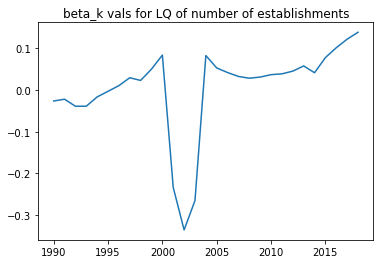

In [159]:
year_beta_k_vals_51_lq_estabs = [(1990,-0.0262306),(1991,-0.0219596),(1992,-0.0388785),(1993,-0.0387969),(1994,-0.0165100),(1996,0.0105986),(1997,0.0295985),(1998,0.0231226),(1999,0.0503394),(2000,0.0839616),(2001,-0.2341132),(2002,-0.3359922),(2003,-0.2655165),(2004,0.0829033),(2005,0.0531465),(2006,0.0420765),(2007,0.0326687),(2008,0.0284926),(2009,0.0312081),(2010,0.0370409),(2011,0.0389450),(2012,0.0454958),(2013,0.0579454),(2014,0.0416422),(2015,0.0780591),(2016,0.1017226),(2017,0.1222420),(2018,0.1389013)]
year, vals = [i for (i, j) in year_beta_k_vals_51_lq_estabs], [j for (i, j) in year_beta_k_vals_51_lq_estabs]
plt.title("beta_k vals for LQ of number of establishments, sector 51")
plt.plot(year, vals)
plt.savefig('./beta_graphs/51/' +  'lq_num_estabs.png')

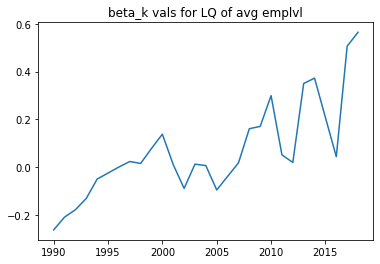

In [160]:
year_beta_k_vals_51_lq_emplvl = [(1990, -0.26239511),(1991, -0.20890436),(1992, -0.17793273),(1993, -0.13069311),(1994, -0.04973620),(1996,  0.00062463),(1997,  0.02370026),(1998,  0.01558392),(1999,  0.07826305),(2000,  0.13802533),(2001,  0.01061585),(2002, -0.08870051),(2003,  0.01274762),(2004,  0.00666619),(2005, -0.09524781),(2006, -0.03859312),(2007,  0.01781016),(2008,  0.16086510),(2009,  0.17056113),(2010,  0.29923664),(2011,  0.05158622),(2012,  0.01960159),(2013,  0.34997482),(2014,  0.37257701),(2015,  0.20766765),(2016,  0.04403133),(2017,  0.50608251),(2018,  0.56436519)]
year, vals = [i for (i, j) in year_beta_k_vals_51_lq_emplvl], [j for (i, j) in year_beta_k_vals_51_lq_emplvl]
plt.title("beta_k vals for LQ of avg emplvl, sector 51")
plt.plot(year, vals)
plt.savefig('./beta_graphs/51/' +  'lq_avg_emplvl.png')

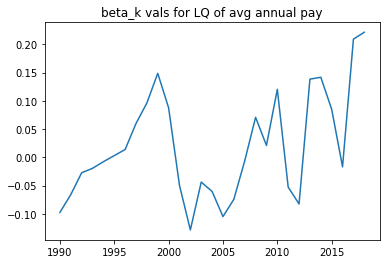

In [161]:
year_beta_k_vals_51_lq_pay = [(1990, -0.0974012),(1991, -0.0658632),(1992, -0.0272742),(1993, -0.0194215),(1994, -0.0077143),(1996,  0.0139078),(1997,  0.0599306),(1998,  0.0962465),(1999,  0.1486517),(2000,  0.0876070),(2001, -0.0495577),(2002, -0.1283952),(2003, -0.0437987),(2004, -0.0603435),(2005, -0.1047855),(2006, -0.0742733),(2007, -0.0062463),(2008,  0.0708526),(2009,  0.0211235),(2010,  0.1203888),(2011, -0.0527509),(2012, -0.0825434),(2013,  0.1383950),(2014,  0.1417412),(2015,  0.0851603),(2016, -0.0167932),(2017,  0.2092014),(2018,  0.2213808),]
year, vals = [i for (i, j) in year_beta_k_vals_51_lq_emplvl], [j for (i, j) in year_beta_k_vals_51_lq_pay]
plt.title("beta_k vals for LQ of avg annual pay")
plt.plot(year, vals)
plt.savefig('./beta_graphs/51/' +  'lq_avg_pay.png')

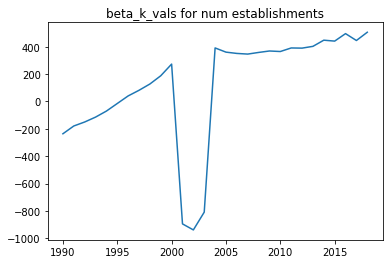

In [232]:
year_beta_k_vals_51_estabs = [(1990, -236.355),(1991, -179.548),(1992, -150.383),(1993, -114.763),(1994,  -70.558),(1996,   40.224),(1997,   81.377),(1998,  127.358),(1999,  187.630),(2000,  272.882),(2001, -895.214),(2002, -939.240),(2003, -809.325),(2004,  391.049),(2005,  360.353),(2006,  350.901),(2007,  346.106),(2008,  358.094),(2009,  368.726),(2010,  364.884),(2011,  390.861),(2012,  389.650),(2013,  402.623),(2014,  447.735),(2015,  440.970),(2016,  495.684),(2017,  445.377),(2018,  505.760),]
year, vals = [i for (i, j) in year_beta_k_vals_51_estabs], [j for (i, j) in year_beta_k_vals_51_estabs]
plt.title("beta_k_vals for num establishments")
plt.plot(year, vals)
plt.savefig('./beta_graphs/51/' +  'num_estabs.png')

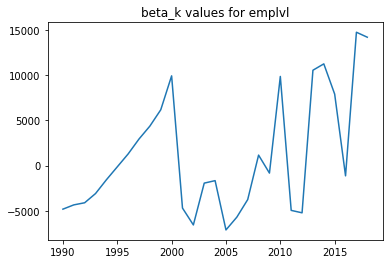

In [233]:
year_beta_k_vals_51_emplvl = [(1990, -4810.64),(1991, -4339.62),(1992, -4105.37),(1993, -3089.65),(1994, -1567.34),(1996,  1283.69),(1997,  2931.54),(1998,  4356.84),(1999,  6156.18),(2000,  9902.86),(2001, -4691.68),(2002, -6552.07),(2003, -1937.53),(2004, -1663.62),(2005, -7102.53),(2006, -5692.65),(2007, -3752.52),(2008,  1154.20),(2009,  -830.39),(2010,  9837.66),(2011, -4946.20),(2012, -5215.19),(2013, 10522.95),(2014, 11224.64),(2015,  7887.46),(2016, -1133.79),(2017, 14716.16),(2018, 14167.56),]
year, vals = [i for (i, j) in year_beta_k_vals_51_emplvl], [j for (i, j) in year_beta_k_vals_51_emplvl]
plt.title("beta_k values for emplvl")
plt.plot(year, vals)
plt.savefig('./beta_graphs/51/' +  'emplvl.png')

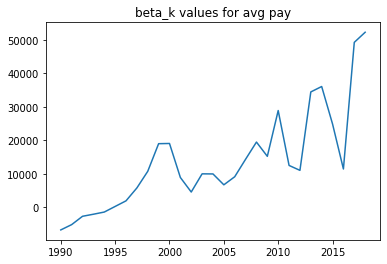

In [234]:
year_beta_k_vals_51_pay = [(1990, -6833.85),(1991, -5246.50),(1992, -2752.85),(1993, -2138.27),(1994, -1485.97),(1996,  1869.81),(1997,  5732.47),(1998, 10710.16),(1999, 18980.05),(2000, 19041.53),(2001,  8864.07),(2002,  4508.90),(2003,  9954.10),(2004,  9922.48),(2005,  6666.81),(2006,  9082.52),(2007, 14320.95),(2008, 19461.82),(2009, 15196.30),(2010, 28900.28),(2011, 12468.45),(2012, 10994.68),(2013, 34472.33),(2014, 36092.50),(2015, 24876.50),(2016, 11407.07),(2017, 49310.93),(2018, 52338.77),]
year, vals = [i for (i, j) in year_beta_k_vals_51_pay], [j for (i, j) in year_beta_k_vals_51_pay]
plt.title("beta_k values for avg pay")
plt.plot(year, vals)
plt.savefig('./beta_graphs/51/' +  'pay.png')

In [167]:
bk_vals_511_lq_estabs = [(1990,  0.0482674), 
(1991,  0.0783218), 
(1992,  0.0418684), 
(1993,  0.0068624), 
(1994,  0.0045504), 
(1996, -0.0070945), 
(1997, -0.0090234), 
(1998, -0.0305452), 
(1999, -0.0357314), 
(2000, -0.0349580), 
(2001, -0.4745158), 
(2002, -0.1699935), 
(2003, -0.1983483), 
(2004, -0.2006026), 
(2005, -0.2201581), 
(2006, -0.2317478), 
(2007, -0.2441131),
(2008, -0.2405595),
(2009, -0.2494070),
(2010, -0.2623111),
(2011, -0.2727113),
(2012, -0.2608895),
(2013, -0.2672860),
(2014, -0.2556826),
(2015, -0.2477498),
(2016, -0.2265996),
(2017, -0.2179529),
(2018, -0.2115319),]


bk_vals_511_lq_emplvl = [(1990, -0.1992034),
(1991, -0.1959925),
(1992, -0.1888462),
(1993, -0.1729759),
(1994, -0.0760855),
(1996,  0.0163870),
(1997,  0.0366235),
(1998,  0.0968298),
(1999,  0.1751510),
(2000,  0.2013148),
(2001, -0.2233789),
(2002,  0.1574231),
(2003,  0.1500812),
(2004,  0.2337031),
(2005, -0.0005920),
(2006,  0.0858146),
(2007,  0.1894077),
(2008,  0.2758064),
(2009,  0.3363170),
(2010,  0.3839973),
(2011,  0.3665645),
(2012,  0.3162981),
(2013,  0.3870867),
(2014,  0.3906379),
(2015,  0.6365015),
(2016,  0.5351864),
(2017,  0.5211471),
(2018,  0.6358538),]


bk_vals_511_lq_pay = [(1990, -0.0569881), 
(1991, -0.0499115), 
(1992, -0.0557868), 
(1993, -0.0729923),
(1994, -0.0356957), 
(1996,  0.0122503), 
(1997,  0.0690020), 
(1998,  0.0731785), 
(1999,  0.0658401), 
(2000,  0.0066387), 
(2001, -0.2408963), 
(2002, -0.0118004), 
(2003, -0.0192374), 
(2004, -0.0058484), 
(2005, -0.1006804), 
(2006, -0.0608406), 
(2007,  0.0230473), 
(2008,  0.0384002), 
(2009,  0.0012544), 
(2010,  0.0426246), 
(2011,  0.0288959), 
(2012,  0.0129178), 
(2013,  0.0149170), 
(2014, -0.0176474), 
(2015,  0.1055283), 
(2016,  0.0497956), 
(2017,  0.0051837), 
(2018,  0.0211049), ]


bk_vals_511_estabs = [
(1990, -103.7940 ),
(1991,  -81.7027 ),
(1992,  -70.1274 ),
(1993,  -56.7838 ),
(1994,  -36.6165 ),
(1996,   19.6947 ),
(1997,   24.0033 ),
(1998,   32.0278 ),
(1999,   27.1697 ),
(2000,   20.2687 ),
(2001, -367.4652 ),
(2002,  -35.0785 ),
(2003,  -18.1422 ),
(2004,  -43.3227 ),
(2005,  -52.2628 ),
(2006,  -61.7134 ),
(2007,  -59.3393 ),
(2008,  -53.9275 ),
(2009,  -69.4189 ),
(2010,  -82.0000 ),
(2011,  -79.4798 ),
(2012,  -70.0191 ),
(2013,  -64.9617 ),
(2014,  -45.9913 ),
(2015,  -34.1254 ),
(2016,  -11.6596 ),
(2017,  -12.8764 ),
(2018,   21.8510 ),]

bk_vals_511_emplvl = [
(1991,   -994.379), 
(1992,  -1509.850), 
(1993,   -973.639), 
(1994,   -756.336), 
(1996,    460.373), 
(1997,   1141.644), 
(1998,   1706.830), 
(1999,   2379.440),
(2000,   3387.433),
(2001, -10959.545), 
(2002,   -411.744), 
(2003,    -39.629), 
(2004,    141.245), 
(2005,  -3232.194), 
(2006,  -3066.608), 
(2007,   -408.726), 
(2008,   -531.411), 
(2009,  -2069.916), 
(2010,  -3522.748), 
(2011,  -3822.089), 
(2012,  -2854.455), 
(2013,  -3135.014), 
(2014,  -3405.078), 
(2015,  -1968.473), 
(2016,  -3341.957), 
(2017,  -3312.477), 
(2018,  -2490.293), ]



bk_vals_511_pay = [(1990, -6664.59  ),(1991, -5498.00  ),(1992, -4194.05  ),(1993, -4732.20  ),(1994, -2505.24  ),(1996,  2285.53  ),(1997,  7881.69  ),(1998, 13050.69  ),(1999, 17685.23  ),(2000, 15575.33  ),(2001, -6621.87  ),(2002, 11457.30  ),(2003, 12331.65  ),(2004, 12368.80  ),(2005,  6112.91  ),(2006, 10298.49  ),(2007, 20281.37  ),(2008, 22222.38  ),(2009, 18800.99  ),(2010, 24435.93  ),(2011, 25553.18  ),(2012, 26881.90  ),(2013, 27493.94  ),(2014, 26793.49  ),(2015, 49761.82  ),(2016, 44849.34  ),(2017, 44740.02  ),(2018, 51354.60  ),]


In [168]:
bk_vals_512_lq_estabs = [
(1990, -0.068279),  
(1991, -0.075554),
(1992, -0.055618),  
(1993, -0.044666),  
(1994, -0.016370),   
(1996,  0.010108),   
(1997,  0.032647),  
(1998,  0.012953),   
(1999, -0.001430),   
(2000,  0.002227),   
(2001, -0.221893),   
(2002, -0.057176),   
(2003,  0.093243),   
(2004, -0.009861),   
(2005, -0.018156),   
(2006, -0.020648),   
(2007, -0.035311),   
(2008, -0.059381),   
(2009, -0.083161),  
(2010, -0.064075),   
(2011, -0.063740),   
(2012, -0.082031),  
(2013, -0.091445), 
(2014, -0.099453),  
(2015, -0.105844),  
(2016, -0.125451),  
(2017, -0.127089), 
(2018, -0.143521), ]

bk_vals_512_lq_emplvl = [
(1990, -0.021649),  
(1991, -0.047044),  
(1992, -0.073354), 
(1993, -0.050361),  
(1994, -0.029707),  
(1996,  0.021175),  
(1997,  0.021404),  
(1998,  0.016140),  
(1999,  0.020793),  
(2000, -0.011028),  
(2001, -0.112629),  
(2002, -0.027062),  
(2003,  0.021247),  
(2004, -0.050196),  
(2005, -0.016540),  
(2006, -0.025607),  
(2007, -0.156098),  
(2008, -0.127735),  
(2009, -0.187661),
(2010, -0.073716),  
(2011, -0.202341),
(2012, -0.191369), 
(2013, -0.065268),  
(2014, -0.068648),  
(2015, -0.006029),  
(2016, -0.122898),  
(2017, -0.079757),  
(2018,  0.033475),  
]

bk_vals_512_lq_pay = [
(1990, -0.029145),   
(1991,  0.009571),   
(1992,  0.012702),   
(1993, -0.017118),   
(1994, -0.000769),   
(1996, -0.004824),   
(1997, -0.021020),   
(1998, -0.007318),   
(1999, -0.000735),   
(2000, -0.025652),   
(2001, -0.109939),   
(2002, -0.033398),   
(2003,  0.020138),   
(2004, -0.037255),   
(2005, -0.005616),   
(2006,  0.007468),   
(2007, -0.097408),   
(2008, -0.046395),   
(2009, -0.087121),   
(2010,  0.002967),   
(2011, -0.103952), 
(2012, -0.144010),
(2013, -0.019315),   
(2014, -0.030409),   
(2015, -0.007439),   
(2016, -0.090617),   
(2017, -0.087384),   
(2018,  0.029404),  ]

bk_vals_512_estabs =[

(1990,  -67.9621),  
(1991,  -52.1965),  
(1992,  -43.2644),  
(1993,  -37.7493),  
(1994,  -21.0832), 
(1996,   11.2726),   
(1997,   19.6959),   
(1998,   21.9042),   
(1999,   16.9474),   
(2000,    8.8704),   
(2001, -174.8623),   
(2002,  -14.6514),   
(2003,    4.7010),   
(2004,   -3.3727),   
(2005,    1.5116),   
(2006,    0.1633),   
(2007,   -1.1703),   
(2008,  -14.7143),   
(2009,  -17.8696),   
(2010,  -18.4003),   
(2011,  -13.9774),   
(2012,  -13.4819),   
(2013,   -8.5445),   
(2014,   -3.6836),   
(2015,   -5.3182),   
(2016,   -8.5743),   
(2017,  -30.2246),   
(2018,  -31.3574),  ]

bk_vals_512_emplvl = [
(1990,   199.267),  
(1991,   -94.687),  
(1992,  -243.570),  
(1993,  -239.507),  
(1994,  -181.858),
(1996,    -7.093),  
(1997,   226.390),  
(1998,   211.075),  
(1999,   116.828),  
(2000,    63.435),  
(2001, -1180.949),  
(2002,   423.807),  
(2003,   495.653),  
(2004,   192.889),  
(2005,   701.775),  
(2006,   661.632),  
(2007,  -281.871),  
(2008,  -262.796),  
(2009,  -927.777),  
(2010,   264.960),  
(2011, -1079.367),
(2012, -1104.112),
(2013,  -379.278),  
(2014,  -373.306),  
(2015,   561.314),  
(2016,  -666.135),  
(2017, -1054.513),  
(2018,    85.742), ] 

bk_vals_512_pay = [
(1990, -1531.883),(1991,  -187.257),(1992,   651.132),(1993,  -493.114),(1994,  -112.162),(1996,   505.502),(1997,    92.863),(1998,  1277.189),(1999,  1905.029),(2000,  1568.216),(2001, -4748.437),(2002,  -305.945),(2003,  3407.055),(2004,   380.038),(2005,  2681.770),(2006,  3880.379),(2007, -3554.368),(2008,  -426.499),(2009, -3119.666),(2010,  4711.808),(2011, -3875.250),(2012, -6346.306),(2013,  3690.331),(2014,  3470.087),(2015,  5126.133),(2016, -3188.488),(2017, -1139.532),(2018,  7877.095),]

In [170]:
bk_vals_515_lq_estabs =[(1990, -0.017271),(1991, -0.026575),(1992, -0.005305),(1993,  0.008265),(1994,  0.014167),(1996,  0.008440),(1997,  0.046396),(1998,  0.041412),(1999,  0.093020),(2000,  0.100771),(2001,  0.019533),(2002,  0.161479),(2003,  0.163249),(2004,  0.085607),(2005,  0.105210),(2006,  0.127210),(2007,  0.132506),(2008,  0.118320),(2009,  0.144072),(2010,  0.162537),(2011,  0.179591),(2012,  0.167674),(2013,  0.179335),(2014,  0.162182),(2015,  0.171365),(2016,  0.148652),(2017,  0.114216),(2018,  0.121323),]

bk_vals_515_lq_emplvl = [
(1990, -0.044614),  
(1991, -0.019242),  
(1992,  0.006430),  
(1993,  0.019375),  
(1994,  0.021805),  
(1996,  0.046588),  
(1997,  0.029183),  
(1998,  0.060738),  
(1999,  0.122754),  
(2000,  0.159702),  
(2001,  0.047785),  
(2002,  0.333962),
(2003,  0.360441),
(2004,  0.330147),
(2005,  0.381091),
(2006,  0.341446),
(2007,  0.405837),
(2008,  0.424173),
(2009,  0.378524),
(2010,  0.401409),
(2011,  0.375203),
(2012,  0.367406),
(2013,  0.383679),
(2014,  0.304200), 
(2015,  0.301662),  
(2016,  0.379269),
(2017,  0.468495),
(2018,  0.268800),  ]

bk_vals_515_lq_pay = [


(1990, -0.005854),    
(1991, -0.000101),    
(1992, -0.001761),    
(1993, -0.026232),   
(1994, -0.025972),    
(1996, -0.042003),    
(1997, -0.032185),    
(1998, -0.020987),    
(1999, -0.093210),   
(2000, -0.090781),   
(2001, -0.450336), 
(2002, -0.025123),    
(2003,  0.015122),    
(2004,  0.043952),    
(2005,  0.061571),    
(2006, -0.105498),    
(2007,  0.026148),    
(2008,  0.061064),    
(2009,  0.020709),    
(2010,  0.035918),    
(2011, -0.000507),    
(2012, -0.013706),    
(2013,  0.005528),    
(2014, -0.173208),    
(2015, -0.175352),    
(2016, -0.093031),    
(2017,  0.043989),    
(2018, -0.171361),]    


bk_vals_515_estabs=[(1990, -13.4515 ),
(1991, -11.9382 ),
(1992,  -7.8127 ),
(1993,  -5.9748 ),
(1994,  -2.6308 ),
(1996,   2.3759 ),
(1997,   3.7850 ),
(1998,   2.1436 ),
(1999,   6.7768 ),
(2000,   8.9059 ),
(2001, -58.2841 ),
(2002,   8.4581 ),
(2003,   7.3471 ),
(2004,   5.0311 ),
(2005,   6.6617 ),
(2006,   8.7927 ),
(2007,  10.6547 ),
(2008,  11.2873 ),
(2009,  13.5048 ),
(2010,  12.6728 ),
(2011,  15.9683 ),
(2012,  16.8833 ),
(2013,  16.1916 ),
(2014,  20.4533 ),
(2015,  20.6299 ),
(2016,  20.6852 ),
(2017,  15.9396 ),
(2018,  16.6684 ),]

bk_vals_515_emplvl = [(1990,  -286.324),(1991,  -258.839),(1992,  -234.636),(1993,  -159.212),(1994,   -23.016),(1996,   240.304),(1997,   234.481),(1998,   405.054),(1999,   763.641),(2000,  1263.666),(2001, -1940.228),(2002,  1008.951),(2003,  1049.091),(2004,  1004.348),(2005,   965.197),(2006,   920.590),(2007,  1122.509),(2008,   935.987),(2009,   746.531),(2010,   586.187),(2011,   414.692),(2012,   422.369),(2013,   528.508),(2014,  -259.985),(2015,  -223.006),(2016,   715.352),(2017,   643.908),(2018,  -312.453),]


bk_vals_515_pay=[(1990,  -4362.28), 
(1991,  -3706.43), 
(1992,  -2481.96), 
(1993,  -2629.48),
(1994,  -1931.88), 
(1996,   -223.39), 
(1997,   1799.60), 
(1998,   5127.34),
(1999,   3639.41), 
(2000,   6218.31), 
(2001, -20543.39), 
(2002,   9151.92), 
(2003,  12279.59),
(2004,  16728.96),
(2005,  18546.43),
(2006,   7313.52), 
(2007,  19070.75),
(2008,  21559.39),
(2009,  19335.32),
(2010,  22043.03),
(2011,  19690.77), 
(2012,  20434.04), 
(2013,  23401.96),
(2014,   7718.71), 
(2015,   9233.76), 
(2016,  16225.93), 
(2017,  31140.63),
(2018,  14197.37), ]

In [172]:
bk_vals_516_lq_estabs=[(1991, -0.16761),  
(1992, -0.22261),  
(1993, -0.30261),  
(1994, -0.20685),  
(1996,  0.84925),  
(1997,  0.59177),  
(1998,  1.13435),  
(1999,  1.38568),  
(2000,  1.51279),  
(2001,  0.86743),  
(2002,  1.29755), 
(2003,  0.98578),  
(2004,  1.47434),
(2005,  1.39094), 
(2006,  1.34547),]


bk_vals_516_lq_emplvl=[(1991, -1.19282),  
(1992, -1.49282), 
(1993, -1.73282), 
(1994, -0.78882), 
(1996,  1.49708),
(1997,  1.52004),  
(1998,  2.27347),  
(1999,  2.20145),  
(2000,  1.75924),  
(2001,  1.39427),  
(2002,  1.78782), 
(2003,  1.42785),  
(2004,  1.28778),  
(2005,  1.30092),  
(2006,  1.75281),]


bk_vals_516_lq_pay=[(1991, -0.07229), 
(1992,  0.02770), 
(1993,  0.21770),
(1994,  0.15133), 
(1996,  0.07333), 
(1997, -0.11160), 
(1998,  0.21180), 
(1999,  0.15706), 
(2000,  0.00652), 
(2001,  0.13732), 
(2002,  0.26953), 
(2003,  0.20328), 
(2004,  0.05094), 
(2005,  0.06291), 
(2006,  0.25313), ]

 
bk_vals_516_estabs=[(1991,   27.296),
(1992,   26.796),
(1993,   25.796),
(1994,   11.264),
(1996,   23.937),
(1997,   31.499),
(1998,   26.532),
(1999,   34.147),
(2000,   55.615),
(2001,   27.099),
(2002,   47.290),
(2003,   29.437),
(2004,   61.523),
(2005,   62.084),
(2006,   65.529),]

bk_vals_516_emplvl=[(1991,  39.9584),  
(1992,  12.9584),  
(1993,  -7.0416),  
(1994, -90.5015),  
(1996, 338.2737), 
(1997, 352.6875),  
(1998, 451.6186), 
(1999, 571.0673),  
(2000, 816.3975),  
(2001, 430.9772),  
(2002, 655.0767),
(2003, 382.2851),  
(2004, 332.5655),  
(2005, 321.0354),  
(2006, 629.6200),]

bk_vals_516_pay=[(1991, -19405.9),(1992, -14026.4),(1993,  -4536.4),(1994,  13106.7),(1996,  21286.4),(1997,   9562.9),(1998,  31919.1),(1999,  34710.6),(2000,  28950.2),(2001,  31503.1),(2002,  42337.5),(2003,  34927.8),(2004,  22531.3),(2005,  24702.1),(2006,  40058.1),]

In [173]:
bk_vals_517_lq_estabs=[(1990, -0.2049137),
(1991, -0.1421928),
(1992, -0.0582981),  
(1993, -0.0403616),  
(1994, -0.0208323),  
(1996,  0.0228149),  
(1997,  0.0433598),  
(1998,  0.0371005),  
(1999,  0.0609745),  
(2000,  0.0659545),  
(2001, -0.1111404),  
(2002,  0.0193238),  
(2003,  0.2169428),  
(2004,  0.0687155),  
(2005,  0.0193866),  
(2006,  0.0044533),  
(2007,  0.0270077),  
(2008,  0.0166774),  
(2009,  0.0344705),  
(2010,  0.0321322),  
(2011,  0.0302005),  
(2012,  0.0142684),  
(2013,  0.0212017),  
(2014,  0.0093826),  
(2015,  0.0309347),  
(2016,  0.0050359),  
(2017, -0.0188962),  
(2018, -0.0099882),  ]


bk_vals_517_lq_emplvl=[(1990, -0.1682269),(1991, -0.1175227),(1992, -0.0951300),(1993, -0.0768726),(1994, -0.0176314),(1996,  0.0315593),(1997,  0.0414901),(1998,  0.0457042),(1999,  0.0640045),(2000,  0.1291248),(2001, -0.1890405),(2002, -0.1169982),(2003,  0.0731459),(2004,  0.2098468),(2005,  0.1522048),(2006,  0.2247393),(2007,  0.0112047),(2008,  0.0579015),(2009, -0.0929019),(2010, -0.0906366),(2011, -0.1353151),(2012, -0.0925012),(2013, -0.1073157),(2014, -0.0183248),(2015, -0.0026228),(2016, -0.0746306),(2017, -0.0324321),(2018, -0.0440359)]


bk_vals_517_lq_pay=[(1990, -0.0310336),  
(1991, -0.0502135),  
(1992, -0.0119312),  
(1993,  0.0244099),  
(1994, -0.0243715),  
(1996, -0.0142053),  
(1997,  0.0265617),  
(1998,  0.0517972),  
(1999,  0.1563977),  
(2000,  0.1135029),  
(2001, -0.0377605),  
(2002,  0.0356395),  
(2003,  0.1760382),  
(2004,  0.3180248),
(2005,  0.2830999), 
(2006,  0.3057219),
(2007,  0.0855630),  
(2008,  0.1335777),  
(2009, -0.0152676),  
(2010, -0.0091412),  
(2011, -0.0733376),  
(2012, -0.0293782),  
(2013, -0.0499951),  
(2014,  0.0483999),  
(2015,  0.1180237),  
(2016,  0.0799958),  
(2017,  0.0915302),  
(2018,  0.0727095), ]


bk_vals_517_estabs=[(1990, -156.6596 ), 
(1991, -114.9063 ), 
(1992,  -78.8206 ), 
(1993,  -48.3981 ), 
(1994,  -21.8238 ), 
(1996,   19.6652 ), 
(1997,   34.9924 ), 
(1998,   49.9423 ), 
(1999,   80.8252 ),
(2000,  113.7652 ),
(2001, -170.4864 ), 
(2002,   23.2820 ), 
(2003,  177.4966 ),
(2004,  166.4385 ),
(2005,  144.4986 ),
(2006,  148.3331 ),
(2007,  204.5037 ),
(2008,  196.5491 ),
(2009,  211.2413 ),
(2010,  207.9168 ),
(2011,  198.4702 ),
(2012,  176.4834 ),
(2013,  163.7216 ),
(2014,  156.9460 ),
(2015,  104.5246 ),
(2016,  106.6419 ),
(2017,   73.5168 ),
(2018,   72.2556 ),]


bk_vals_517_emplvl=[(1990, -2491.29  ),
(1991, -1798.52  ),
(1992, -2003.49  ),
(1993, -1521.03  ),
(1994,  -382.21  ),
(1996,   769.75  ),
(1997,  1467.83  ),
(1998,  2280.70  ),
(1999,  2753.88  ),
(2000,  4697.95  ),
(2001, -8582.43  ),
(2002, -1762.35  ),
(2003,  2124.16  ),
(2004,  3146.82  ),
(2005,  2163.45  ),
(2006,  2446.16  ),
(2007, -1943.23  ),
(2008, -1286.31  ),
(2009, -3542.43  ),
(2010, -3555.90  ),
(2011, -4464.05  ),
(2012, -4085.96  ),
(2013, -4223.53  ),
(2014, -1416.10  ),
(2015, -2083.05  ),
(2016, -4596.38  ),
(2017, -4631.20  ),
(2018, -4918.29  ),]


bk_vals_517_pay=[(1990, -3706.49  ),
(1991, -3924.50  ),
(1992, -1402.28  ),
(1993,   513.24  ),
(1994, -1585.86  ),
(1996,  -103.50  ),
(1997,  2916.53  ),
(1998,  6311.07  ),
(1999, 14422.01  ),
(2000, 13875.78  ),
(2001,  -889.09  ),
(2002,  5023.78  ),
(2003, 17005.80  ),
(2004, 28170.09  ),
(2005, 26604.19  ),
(2006, 29820.39  ),
(2007, 14709.32  ),
(2008, 18684.31  ),
(2009,  5327.80  ),
(2010,  6789.04  ),
(2011,  2259.71  ),
(2012,  6600.11  ),
(2013,  5633.35  ),
(2014, 12281.84  ),
(2015, 20216.63  ),
(2016, 16426.14  ),
(2017, 18717.28  ),
(2018, 17662.00  ),]


In [174]:
bk_vals_518_lq_estabs = [(1990,  0.0435709),
(1991,  0.1682236),
(1992,  0.1044770),
(1993,  0.0886479),
(1994,  0.1067179),
(1996, -0.0587570),
(1997, -0.0592490),
(1998, -0.0878871),
(1999, -0.0809751),
(2000,  0.0265973),
(2001, -0.4739284),
(2002,  0.0249984),
(2003, -0.0728854),
(2004, -0.0593730),
(2005, -0.1139070),
(2006, -0.1368348),
(2007, -0.1059172),
(2008, -0.1401817),
(2009, -0.1555400),
(2010, -0.1859412),
(2011, -0.1744236),
(2012, -0.1712373),
(2013, -0.1133578),
(2014, -0.0692966),
(2015, -0.0666435),
(2016,  0.0071088),
(2017,  0.0555986),
(2018,  0.0318822),]


bk_vals_518_lq_emplvl = [(1990, -0.4455314),
(1991, -0.1613946),
(1992, -0.0670434),
(1993, -0.0474781),
(1994,  0.0037875),
(1996,  0.0482955),
(1997,  0.2108764),
(1998,  0.0205640),
(1999, -0.0802809),
(2000, -0.0275802),
(2001, -0.6915368),
(2002, -0.1406027),
(2003, -0.2827086),
(2004, -0.2169309),
(2005, -0.1659625),
(2006, -0.3000768),
(2007, -0.2602435),
(2008, -0.3398030),
(2009, -0.3982196),
(2010, -0.6486662),
(2011, -0.7308155),
(2012, -0.2147500),
(2013, -0.2356181),
(2014, -0.0270614),
(2015, -0.1410076),
(2016, -0.1562328),
(2017, -0.2528234),
(2018, -0.1684476),]



bk_vals_518_lq_pay = [(1990, -0.0275297),  
(1991,  0.0290648),  
(1992,  0.0514965),  
(1993,  0.0717227),  
(1994,  0.0228000),  
(1996,  0.0083060),  
(1997,  0.0725548),  
(1998,  0.1057644),  
(1999,  0.0826662),  
(2000,  0.0328964),  
(2001, -0.1315335),  
(2002,  0.1371914),  
(2003,  0.0572987),  
(2004,  0.0457931),  
(2005,  0.1770083),  
(2006,  0.1144197),  
(2007,  0.1815385),  
(2008,  0.1701501),  
(2009,  0.2003106),  
(2010, -0.0012516),  
(2011, -0.0988283),  
(2012,  0.1798228), 
(2013,  0.1353981),  
(2014,  0.2415865),
(2015,  0.1963301), 
(2016,  0.2327333),
(2017,  0.1115334),  
(2018,  0.1414641),]



bk_vals_518_estabs = [(1990,  -23.5806 ), 
(1991,  -20.0004 ), 
(1992,  -10.4794 ), 
(1993,   -9.4715 ), 
(1994,  -14.4460 ), 
(1996,    5.3489 ), 
(1997,   13.0136 ), 
(1998,   40.0664 ), 
(1999,   74.9477 ), 
(2000,  153.0736 ), 
(2001, -109.3231 ), 
(2002,  148.5080 ), 
(2003,  106.0631 ), 
(2004,  103.9576 ), 
(2005,   93.8191 ), 
(2006,   85.7237 ),
(2007,   -8.2153 ), 
(2008,    3.4432 ), 
(2009,    3.3777 ), 
(2010,    3.5440 ), 
(2011,    8.7246 ), 
(2012,    7.7257 ), 
(2013,   14.4455 ), 
(2014,   23.0822 ), 
(2015,   32.7777 ), 
(2016,   49.6284 ), 
(2017,   51.5512 ), 
(2018,   73.0791 ),]

bk_vals_518_emplvl=[(1990, -1271.741 ),(1991, -1137.402 ),(1992,  -729.423 ),(1993,  -585.437 ),(1994,  -437.337 ),(1996,    47.051 ),(1997,   871.908 ),(1998,  1437.472 ),(1999,   757.752 ),(2000,  2236.849 ),(2001, -4466.368 ),(2002,  1395.786 ),(2003,   518.563 ),(2004,   902.515 ),(2005,   948.716 ),(2006,   374.053 ),(2007, -1841.968 ),(2008, -2611.531 ),(2009, -2641.159 ),(2010, -4104.466 ),(2011, -4180.258 ),(2012, -2990.770 ),(2013, -2668.743 ),(2014, -2389.792 ),(2015, -2249.255 ),(2016, -2032.899 ),(2017, -1923.043 ),(2018, -1440.457 ),]
  
bk_vals_518_pay=[(1990, -1898.55  ),
(1991,  -815.50  ),
(1992,  1049.12  ),
(1993,  1804.71  ),
(1994,  -978.04  ),
(1996,   401.90  ),
(1997,  4393.20  ),
(1998, 10359.15  ),
(1999, 12483.64  ),
(2000, 11723.52  ),
(2001, -9924.28  ),
(2002, 11531.00  ),
(2003,  6645.95  ),
(2004,  9053.91  ),
(2005, 25323.09  ),
(2006, 17307.71  ),
(2007, 22772.11  ),
(2008, 19728.96  ),
(2009, 25462.67  ),
(2010, 11120.79  ),
(2011,  3367.54  ),
(2012, 27791.85  ),
(2013, 24798.48  ),
(2014, 37077.36  ),
(2015, 36177.11  ),
(2016, 43550.43  ),
(2017, 35743.96  ),
(2018, 45239.76  ),]

In [175]:

bk_vals_519_lq_estabs=[(1990,  0.304612 ),
(1991,  0.204204 ),
(1992,  0.186449 ),
(1993,  0.243592 ),
(1994,  0.104483 ),
(1996,  0.185429 ),
(1997,  0.148694 ),
(1998,  0.120939 ),
(1999,  0.128694 ),
(2000,  0.027768 ),
(2001, -0.527161 ),
(2002,  0.284077 ),
(2003,  0.345267 ),
(2004,  0.051775 ),
(2005,  0.114703 ),
(2006,  0.070881 ),
(2007,  0.430631 ),
(2008,  0.432767 ),
(2009,  0.451239 ),
(2010,  0.475969 ),
(2011,  0.444621 ),
(2012,  0.479043 ),
(2013,  0.442442 ),
(2014,  0.232472 ),
(2015,  0.357044 ),
(2016,  0.449173 ),
(2017,  0.523421 ),
(2018,  0.536040 ),]

bk_vals_519_lq_emplvl=[(1990, -0.1770232),(1991, -0.0839619),(1992, -0.1790640),(1993, -0.2098803),(1994,  0.1239655),(1996,  0.0803238),(1997, -0.0264109),(1998,  0.1033850),(1999,  0.2290993),(2000,  0.1888865),(2001, -0.7591869),(2002, -0.0098508),(2003,  0.0110798),(2004, -0.2733189),(2005, -0.2473692),(2006, -0.2788270),(2007,  0.6386660),(2008,  0.9139454),(2009,  0.8438496),(2010,  0.9263535),(2011,  1.2223824),(2012,  1.0507067),(2013,  1.0541342),(2014,  1.1325191),(2015,  1.1382476),(2016,  1.0536859),(2017,  1.0864615),(2018,  1.0406331),]


bk_vals_519_lq_pay=[(1990, -0.3247787), 
(1991, -0.0960032),   
(1992, -0.1125338),   
(1993, -0.1123297),   
(1994, -0.0165517),   
(1996, -0.1184521), 
(1997, -0.0913093),   
(1998, -0.0727378),   
(1999, -0.0500848),   
(2000, -0.0947839),   
(2001, -0.3430640), 
(2002,  0.1779625), 
(2003,  0.1081651),   
(2004, -0.0834544),   
(2005,  0.0009167),   
(2006, -0.1242733),   
(2007, -0.1533421), 
(2008, -0.0514965),   
(2009, -0.1263549),   
(2010, -0.1479885),   
(2011, -0.1030713),   
(2012, -0.2028232), 
(2013, -0.2472303),
(2014, -0.1964205), 
(2015, -0.2191682), 
(2016, -0.2258241), 
(2017, -0.2335683), 
(2018, -0.2476202),]


bk_vals_519_estabs=[(1990, -51.22664 ),
(1991, -50.94092 ),
(1992, -49.26745 ),
(1993, -48.83888 ),
(1994,   0.62069 ),
(1996, -43.81847 ),
(1997, -40.36949 ),
(1998, -39.16541 ),
(1999, -38.43072 ),
(2000, -33.39273 ),
(2001, -91.73316 ),
(2002, -47.41617 ),
(2003, -40.27714 ),
(2004, -34.07408 ),
(2005, -32.81905 ),
(2006, -39.31772 ),
(2007,  43.21836 ),
(2008,  58.19904 ),
(2009,  70.35341 ),
(2010,  83.31468 ),
(2011, 103.98893 ),
(2012, 114.41228 ),
(2013, 123.33218 ),
(2014, 137.81311 ),
(2015, 162.76957 ),
(2016, 179.10268 ),
(2017, 187.79475 ),
(2018, 192.95143 ),]


bk_vals_519_emplvl=[(1990, -1180.601 ),
(1991, -1187.519 ),
(1992, -1200.519 ),
(1993, -1208.254 ),
(1994,   -46.569 ),
(1996,  -959.703 ),
(1997,  -964.376 ),
(1998,  -888.581 ),
(1999,  -805.213 ),
(2000,  -750.664 ),
(2001,  -389.707 ),
(2002,   135.591 ),
(2003,   236.407 ),
(2004,    98.525 ),
(2005,    71.607 ),
(2006,     9.746 ),
(2007,  1404.879 ),
(2008,  2073.952 ),
(2009,  1725.856 ),
(2010,  1870.052 ),
(2011,  2780.353 ),
(2012,  3035.605 ),
(2013,  3456.892 ),
(2014,  3951.944 ),
(2015,  4344.611 ),
(2016,  4317.779 ),
(2017,  4797.326 ),
(2018,  5086.361 ),]


bk_vals_519_pay=[(1990, -16499.99 ),  
(1991,  -9616.83 ),   
(1992,  -9232.56 ),   
(1993,  -9012.09 ),   
(1994,  -1773.86 ),   
(1996,  -5627.73 ),   
(1997,  -4230.28 ),   
(1998,  -2101.62 ),   
(1999,   -370.64 ),   
(2000,   -532.45 ),   
(2001,  -4980.92 ),   
(2002,  17225.15 ),  
(2003,  16558.78 ),  
(2004,  10980.42 ),   
(2005,  15512.05 ),   
(2006,   8504.26 ),   
(2007,  30208.57 ), 
(2008,  40218.95 ),
(2009,  32274.61 ), 
(2010,  34315.53 ), 
(2011,  48625.34 ),
(2012,  41052.90 ),
(2013,  49125.12 ),
(2014,  57878.82 ),
(2015,  56373.82 ),
(2016,  56881.80 ),
(2017,  61453.21 ),
(2018,  65836.79 ),]

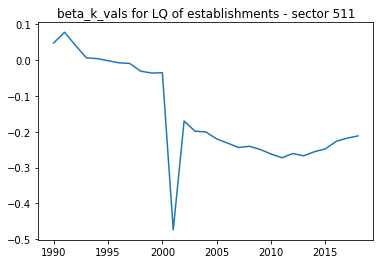

In [235]:
year, vals = [i for (i, j) in bk_vals_511_lq_estabs], [j for (i, j) in bk_vals_511_lq_estabs]
plt.title("beta_k_vals for LQ of establishments - sector 511")
plt.plot(year, vals)
plt.savefig('./beta_graphs/511/' +  'lq_num_estabs.png')

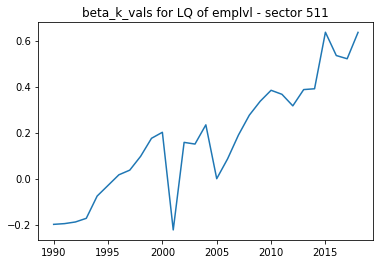

In [236]:
year, vals = [i for (i, j) in bk_vals_511_lq_emplvl], [j for (i, j) in bk_vals_511_lq_emplvl]
plt.title("beta_k_vals for LQ of emplvl - sector 511")
plt.plot(year, vals)
plt.savefig('./beta_graphs/511/' +  'lq_avg_emplvl.png')

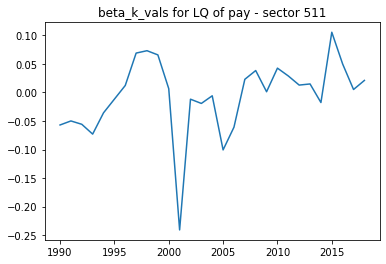

In [237]:
year, vals = [i for (i, j) in bk_vals_511_lq_pay], [j for (i, j) in bk_vals_511_lq_pay]
plt.title("beta_k_vals for LQ of pay - sector 511")
plt.plot(year, vals)
plt.savefig('./beta_graphs/511/' +  'lq_pay.png')

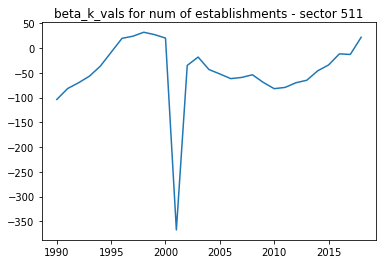

In [238]:
year, vals = [i for (i, j) in bk_vals_511_estabs], [j for (i, j) in bk_vals_511_estabs]
plt.title("beta_k_vals for num of establishments - sector 511")
plt.plot(year, vals)
plt.savefig('./beta_graphs/511/' +  'num_estabs.png')

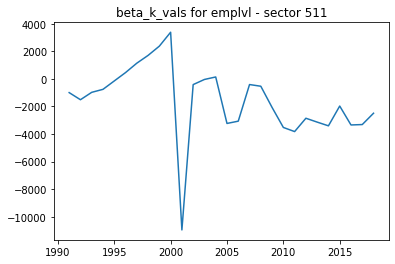

In [239]:
year, vals = [i for (i, j) in bk_vals_511_emplvl], [j for (i, j) in bk_vals_511_emplvl]
plt.title("beta_k_vals for emplvl - sector 511")
plt.plot(year, vals)
plt.savefig('./beta_graphs/511/' +  'emplvl.png')

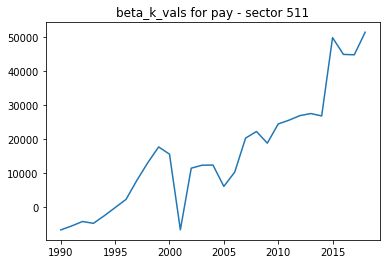

In [240]:
year, vals = [i for (i, j) in bk_vals_511_pay], [j for (i, j) in bk_vals_511_pay]
plt.title("beta_k_vals for pay - sector 511")
plt.plot(year, vals)
plt.savefig('./beta_graphs/511/' +  'pay.png')

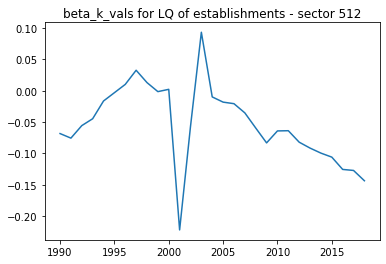

In [241]:
year, vals = [i for (i, j) in bk_vals_512_lq_estabs], [j for (i, j) in bk_vals_512_lq_estabs]
plt.title("beta_k_vals for LQ of establishments - sector 512")
plt.plot(year, vals)
plt.savefig('./beta_graphs/512/' +  'lq_num_estabs.png')

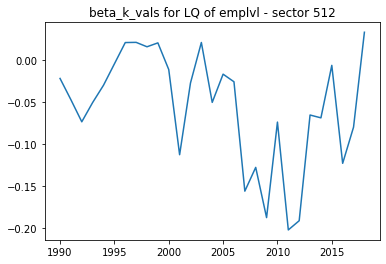

In [242]:
year, vals = [i for (i, j) in bk_vals_512_lq_emplvl], [j for (i, j) in bk_vals_512_lq_emplvl]
plt.title("beta_k_vals for LQ of emplvl - sector 512")
plt.plot(year, vals)
plt.savefig('./beta_graphs/512/' +  'lq_avg_emplvl.png')

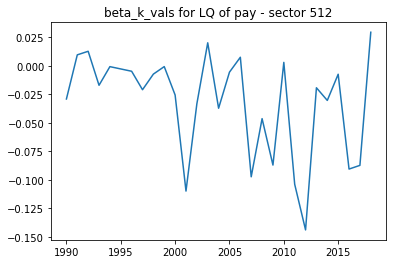

In [243]:
year, vals = [i for (i, j) in bk_vals_512_lq_pay], [j for (i, j) in bk_vals_512_lq_pay]
plt.title("beta_k_vals for LQ of pay - sector 512")
plt.plot(year, vals)
plt.savefig('./beta_graphs/512/' +  'lq_pay.png')

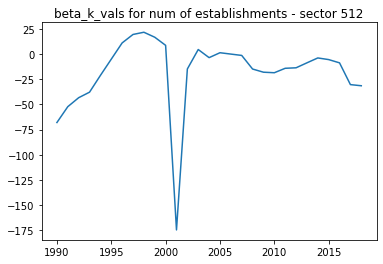

In [244]:
year, vals = [i for (i, j) in bk_vals_512_estabs], [j for (i, j) in bk_vals_512_estabs]
plt.title("beta_k_vals for num of establishments - sector 512")
plt.plot(year, vals)
plt.savefig('./beta_graphs/512/' +  'num_estabs.png')

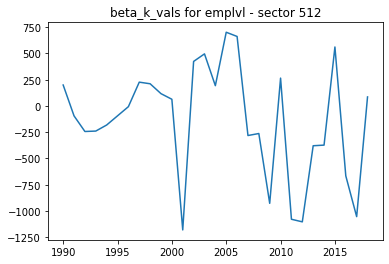

In [245]:
year, vals = [i for (i, j) in bk_vals_512_emplvl], [j for (i, j) in bk_vals_512_emplvl]
plt.title("beta_k_vals for emplvl - sector 512")
plt.plot(year, vals)
plt.savefig('./beta_graphs/512/' +  'avg_emplvl.png')

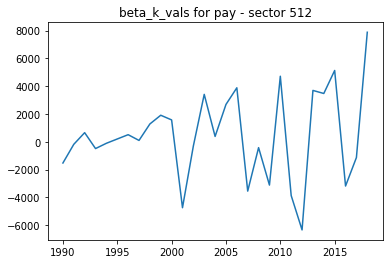

In [246]:
year, vals = [i for (i, j) in bk_vals_512_pay], [j for (i, j) in bk_vals_512_pay]
plt.title("beta_k_vals for pay - sector 512")
plt.plot(year, vals)
plt.savefig('./beta_graphs/512/' +  'pay.png')

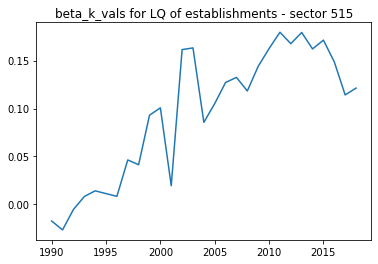

In [247]:
year, vals = [i for (i, j) in bk_vals_515_lq_estabs], [j for (i, j) in bk_vals_515_lq_estabs]
plt.title("beta_k_vals for LQ of establishments - sector 515")
plt.plot(year, vals)
plt.savefig('./beta_graphs/515/' +  'lq_num_estabs.png')

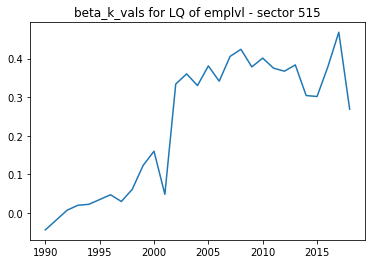

In [248]:
year, vals = [i for (i, j) in bk_vals_515_lq_emplvl], [j for (i, j) in bk_vals_515_lq_emplvl]
plt.title("beta_k_vals for LQ of emplvl - sector 515")
plt.plot(year, vals)
plt.savefig('./beta_graphs/515/' +  'lq_avg_emplvl.png')

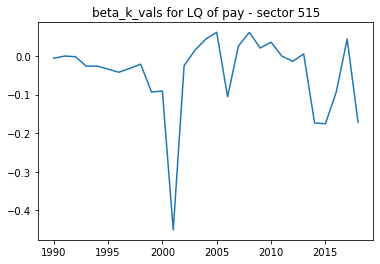

In [249]:
year, vals = [i for (i, j) in bk_vals_515_lq_pay], [j for (i, j) in bk_vals_515_lq_pay]
plt.title("beta_k_vals for LQ of pay - sector 515")
plt.plot(year, vals)
plt.savefig('./beta_graphs/515/' +  'lq_pay.png')

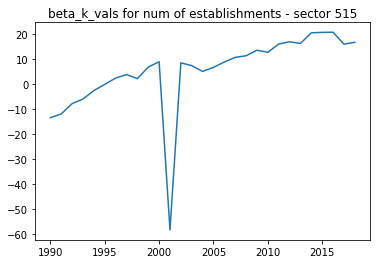

In [250]:
year, vals = [i for (i, j) in bk_vals_515_estabs], [j for (i, j) in bk_vals_515_estabs]
plt.title("beta_k_vals for num of establishments - sector 515")
plt.plot(year, vals)
plt.savefig('./beta_graphs/515/' +  'num_estabs.png')

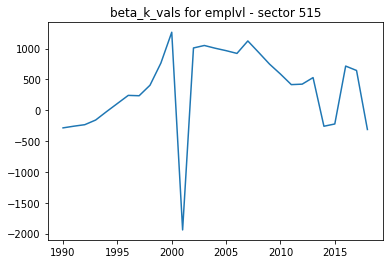

In [251]:
year, vals = [i for (i, j) in bk_vals_515_emplvl], [j for (i, j) in bk_vals_515_emplvl]
plt.title("beta_k_vals for emplvl - sector 515")
plt.plot(year, vals)
plt.savefig('./beta_graphs/515/' +  'avg_emplvl.png')

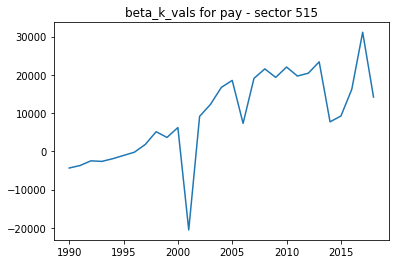

In [252]:
year, vals = [i for (i, j) in bk_vals_515_pay], [j for (i, j) in bk_vals_515_pay]
plt.title("beta_k_vals for pay - sector 515")
plt.plot(year, vals)
plt.savefig('./beta_graphs/515/' +  'pay.png')

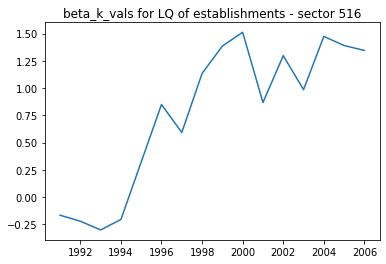

In [253]:
year, vals = [i for (i, j) in bk_vals_516_lq_estabs], [j for (i, j) in bk_vals_516_lq_estabs]
plt.title("beta_k_vals for LQ of establishments - sector 516")
plt.plot(year, vals)
plt.savefig('./beta_graphs/516/' +  'lq_num_estabs.png')

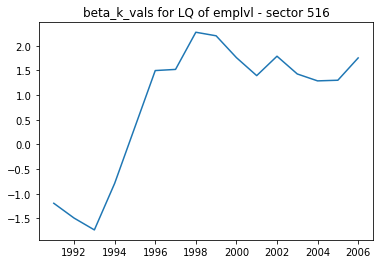

In [254]:
year, vals = [i for (i, j) in bk_vals_516_lq_emplvl], [j for (i, j) in bk_vals_516_lq_emplvl]
plt.title("beta_k_vals for LQ of emplvl - sector 516")
plt.plot(year, vals)
plt.savefig('./beta_graphs/516/' +  'lq_avg_emplvl.png')

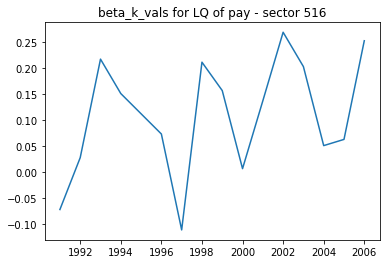

In [255]:
year, vals = [i for (i, j) in bk_vals_516_lq_pay], [j for (i, j) in bk_vals_516_lq_pay]
plt.title("beta_k_vals for LQ of pay - sector 516")
plt.plot(year, vals)
plt.savefig('./beta_graphs/516/' +  'lq_avg_pay.png')

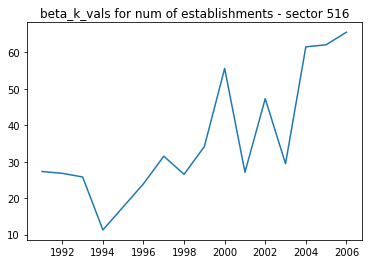

In [256]:
year, vals = [i for (i, j) in bk_vals_516_estabs], [j for (i, j) in bk_vals_516_estabs]
plt.title("beta_k_vals for num of establishments - sector 516")
plt.plot(year, vals)
plt.savefig('./beta_graphs/516/' +  'num_estabs.png')

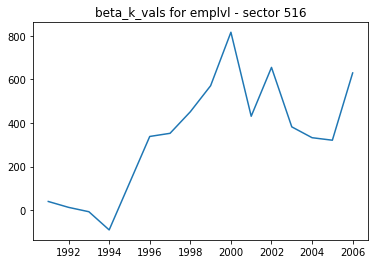

In [257]:
year, vals = [i for (i, j) in bk_vals_516_emplvl], [j for (i, j) in bk_vals_516_emplvl]
plt.title("beta_k_vals for emplvl - sector 516")
plt.plot(year, vals)
plt.savefig('./beta_graphs/516/' +  'avg_emplvl.png')

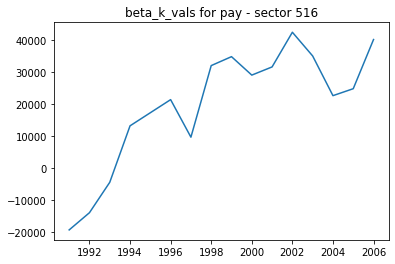

In [258]:
year, vals = [i for (i, j) in bk_vals_516_pay], [j for (i, j) in bk_vals_516_pay]
plt.title("beta_k_vals for pay - sector 516")
plt.plot(year, vals)
plt.savefig('./beta_graphs/516/' +  'avg_pay.png')

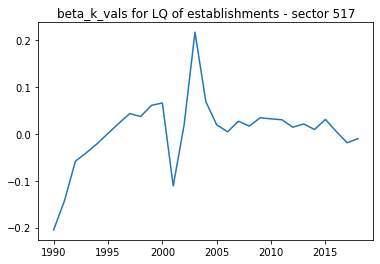

In [259]:
year, vals = [i for (i, j) in bk_vals_517_lq_estabs], [j for (i, j) in bk_vals_517_lq_estabs]
plt.title("beta_k_vals for LQ of establishments - sector 517")
plt.plot(year, vals)
plt.savefig('./beta_graphs/517/' +  'lq_num_estabs.png')

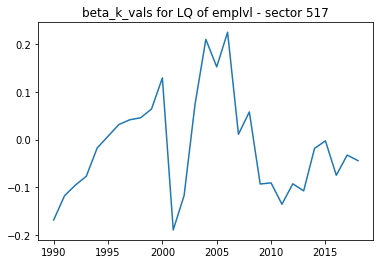

In [260]:
year, vals = [i for (i, j) in bk_vals_517_lq_emplvl], [j for (i, j) in bk_vals_517_lq_emplvl]
plt.title("beta_k_vals for LQ of emplvl - sector 517")
plt.plot(year, vals)
plt.savefig('./beta_graphs/517/' +  'lq_avg_emplvl.png')

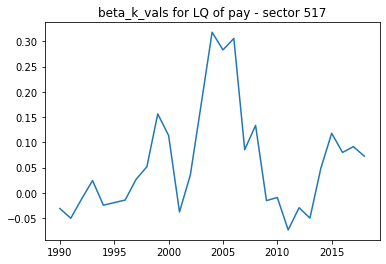

In [261]:

year, vals = [i for (i, j) in bk_vals_517_lq_pay], [j for (i, j) in bk_vals_517_lq_pay]
plt.title("beta_k_vals for LQ of pay - sector 517")
plt.plot(year, vals)
plt.savefig('./beta_graphs/517/' +  'lq_pay.png')

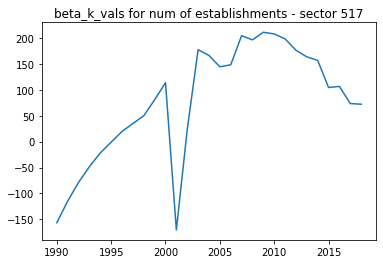

In [262]:

year, vals = [i for (i, j) in bk_vals_517_estabs], [j for (i, j) in bk_vals_517_estabs]
plt.title("beta_k_vals for num of establishments - sector 517")
plt.plot(year, vals)
plt.savefig('./beta_graphs/517/' +  'num_estabs.png')

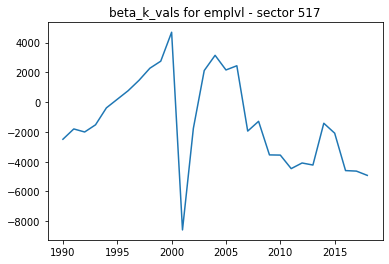

In [263]:

year, vals = [i for (i, j) in bk_vals_517_emplvl], [j for (i, j) in bk_vals_517_emplvl]
plt.title("beta_k_vals for emplvl - sector 517")
plt.plot(year, vals)
plt.savefig('./beta_graphs/517/' +  'emplvl.png')


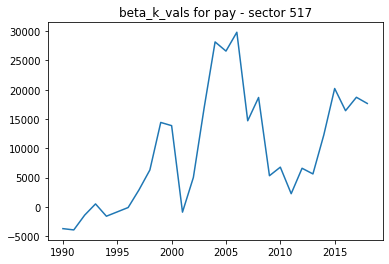

In [264]:

year, vals = [i for (i, j) in bk_vals_517_pay], [j for (i, j) in bk_vals_517_pay]
plt.title("beta_k_vals for pay - sector 517")
plt.plot(year, vals)
plt.savefig('./beta_graphs/517/' +  'pay.png')

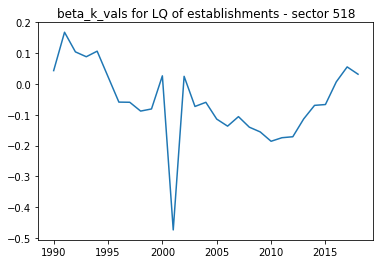

In [265]:
year, vals = [i for (i, j) in bk_vals_518_lq_estabs], [j for (i, j) in bk_vals_518_lq_estabs]
plt.title("beta_k_vals for LQ of establishments - sector 518")
plt.plot(year, vals)
plt.savefig('./beta_graphs/518/' +  'lq_num_estabs.png')

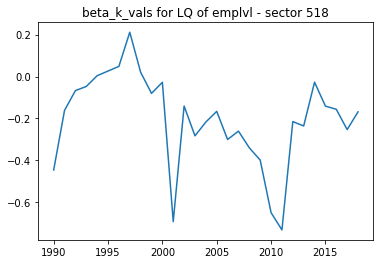

In [266]:
year, vals = [i for (i, j) in bk_vals_518_lq_emplvl], [j for (i, j) in bk_vals_518_lq_emplvl]
plt.title("beta_k_vals for LQ of emplvl - sector 518")
plt.plot(year, vals)
plt.savefig('./beta_graphs/518/' +  'lq_emplvl.png')

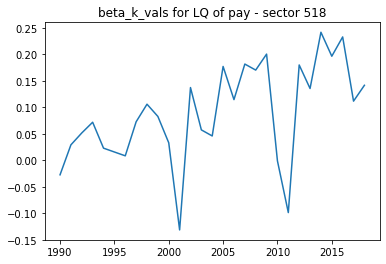

In [267]:
year, vals = [i for (i, j) in bk_vals_518_lq_pay], [j for (i, j) in bk_vals_518_lq_pay]
plt.title("beta_k_vals for LQ of pay - sector 518")
plt.plot(year, vals)
plt.savefig('./beta_graphs/518/' +  'lq_pay.png')

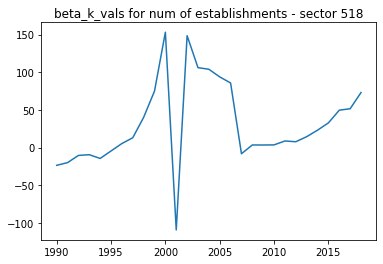

In [268]:
year, vals = [i for (i, j) in bk_vals_518_estabs], [j for (i, j) in bk_vals_518_estabs]
plt.title("beta_k_vals for num of establishments - sector 518")
plt.plot(year, vals)
plt.savefig('./beta_graphs/518/' +  'num_estabs.png')

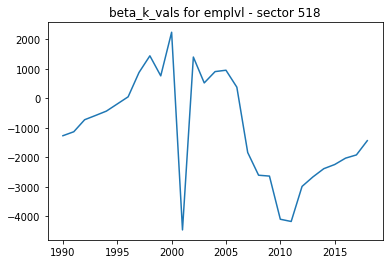

In [269]:
year, vals = [i for (i, j) in bk_vals_518_emplvl], [j for (i, j) in bk_vals_518_emplvl]
plt.title("beta_k_vals for emplvl - sector 518")
plt.plot(year, vals)
plt.savefig('./beta_graphs/518/' +  'emplvl.png')

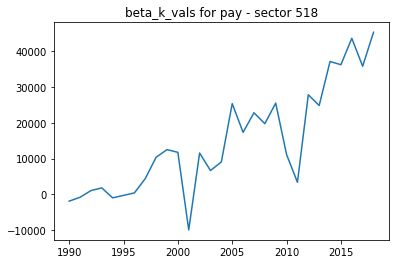

In [270]:
year, vals = [i for (i, j) in bk_vals_518_pay], [j for (i, j) in bk_vals_518_pay]
plt.title("beta_k_vals for pay - sector 518")
plt.plot(year, vals)
plt.savefig('./beta_graphs/518/' +  'pay.png')

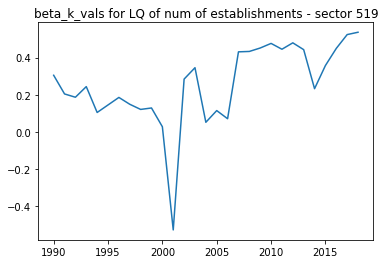

In [271]:
year, vals = [i for (i, j) in bk_vals_519_lq_estabs], [j for (i, j) in bk_vals_519_lq_estabs]
plt.title("beta_k_vals for LQ of num of establishments - sector 519")
plt.plot(year, vals)
plt.savefig('./beta_graphs/519/' +  'lq_estabs.png')


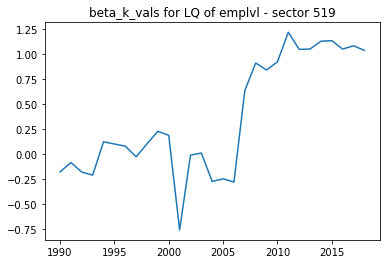

In [272]:
year, vals = [i for (i, j) in bk_vals_519_lq_emplvl], [j for (i, j) in bk_vals_519_lq_emplvl]
plt.title("beta_k_vals for LQ of emplvl - sector 519")
plt.plot(year, vals)
plt.savefig('./beta_graphs/519/' +  'lq_emplvl.png')


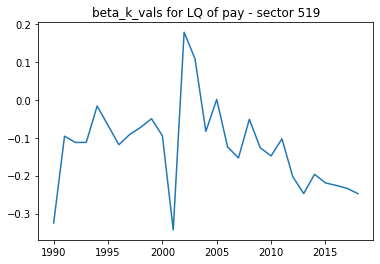

In [273]:
year, vals = [i for (i, j) in bk_vals_519_lq_pay], [j for (i, j) in bk_vals_519_lq_pay]
plt.title("beta_k_vals for LQ of pay - sector 519")
plt.plot(year, vals)
plt.savefig('./beta_graphs/519/' +  'lq_pay.png')


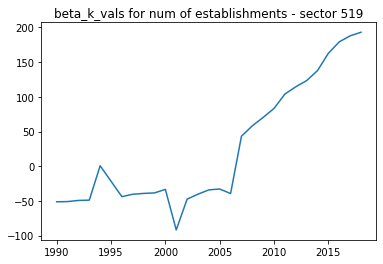

In [274]:
year, vals = [i for (i, j) in bk_vals_519_estabs], [j for (i, j) in bk_vals_519_estabs]
plt.title("beta_k_vals for num of establishments - sector 519")
plt.plot(year, vals)
plt.savefig('./beta_graphs/519/' +  'estabs.png')

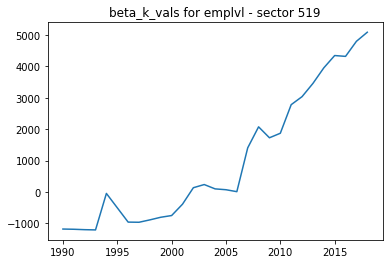

In [275]:
year, vals = [i for (i, j) in bk_vals_519_emplvl], [j for (i, j) in bk_vals_519_emplvl]
plt.title("beta_k_vals for emplvl - sector 519")
plt.plot(year, vals)
plt.savefig('./beta_graphs/519/' +  'emplvl.png')

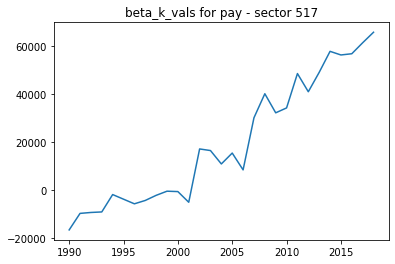

In [276]:

year, vals = [i for (i, j) in bk_vals_519_pay], [j for (i, j) in bk_vals_519_pay]
plt.title("beta_k_vals for pay - sector 517")
plt.plot(year, vals)
plt.savefig('./beta_graphs/519/' +  'pay.png')